# Credit Card Approvals

#### Import Packages

In [1]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import datetime as dt
import scipy as scp

#linear regression
from pylab import *
import statsmodels.api as sm
import statsmodels.stats.api as sms


#Machine Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


###scikit Learn Modules needed for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,StandardScaler 
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

import warnings
warnings.filterwarnings('ignore')

#### Create dFs

In [2]:
applications = pd.read_csv('../Data/application_record.csv')
records = pd.read_csv('../Data/credit_record.csv')

## Data Exploration and Wrangling

In [3]:
applications.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
records.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
applications.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [7]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [11]:
# merge the ORIGINAL datasets
merged = pd.merge(applications, records, on="ID")

In [12]:
merged.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [9]:
# drop duplicates (records)
records2=records.drop_duplicates(subset=records.columns[1:], keep='first')

In [10]:
records2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 947126
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              463 non-null    int64 
 1   MONTHS_BALANCE  463 non-null    int64 
 2   STATUS          463 non-null    object
dtypes: int64(2), object(1)
memory usage: 14.5+ KB


In [8]:
# subset data - drop variables that most likely won't affect the DV.
applications2 = applications.drop(['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], axis=1)

In [9]:
# Rename columns
applications2.rename(columns={'CODE_GENDER': 'gender', 'FLAG_OWN_CAR' : 'ownsCar', 'FLAG_OWN_REALTY' : 'ownsRealty', 'CNT_CHILDREN' : 'numChildren', 'AMT_INCOME_TOTAL' : 'totalIncome', 'NAME_INCOME_TYPE' : 'incomeType', 'NAME_EDUCATION_TYPE' : 'EduLvl', 'NAME_FAMILY_STATUS': 'famStatus', 'NAME_HOUSING_TYPE' : 'housingType', 'DAYS_BIRTH' : 'daysBirth', 'DAYS_EMPLOYED' : 'daysEmpl', 'OCCUPATION_TYPE' : 'occupation', 'CNT_FAM_MEMBERS' : 'famSize'}, inplace = True)

In [10]:
# replace missing values for occupation type with "Not identified"
applications2['occupation'].fillna(value='Not identified', inplace=True)

In [11]:
applications2.head()

,ID,gender,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,EduLvl,famStatus,housingType,daysBirth,daysEmpl,occupation,famSize
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Not identified,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,Not identified,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1.0


In [12]:
# convert daysBirth to Age in years
applications2['age'] = np.ceil(pd.to_timedelta(applications2['daysBirth'], unit='D').dt.days / -365.25)
applications2.drop('daysBirth', axis = 1, inplace = True)

In [13]:
# convert daysEmpl to yrsEmpl
applications2['yrsEmpl']=-applications2['daysEmpl']/365.2425
applications2.loc[applications2['yrsEmpl']<0,'yrsEmpl']=0
applications2.drop('daysEmpl', axis=1, inplace=True)

In [14]:
applications2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           438557 non-null  int64  
 1   gender       438557 non-null  object 
 2   ownsCar      438557 non-null  object 
 3   ownsRealty   438557 non-null  object 
 4   numChildren  438557 non-null  int64  
 5   totalIncome  438557 non-null  float64
 6   incomeType   438557 non-null  object 
 7   EduLvl       438557 non-null  object 
 8   famStatus    438557 non-null  object 
 9   housingType  438557 non-null  object 
 10  occupation   438557 non-null  object 
 11  famSize      438557 non-null  float64
 12  age          438557 non-null  float64
 13  yrsEmpl      438557 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 46.8+ MB


In [15]:
applications2.head()

,ID,gender,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,EduLvl,famStatus,housingType,occupation,famSize,age,yrsEmpl
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,59.0,3.104787
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,8.353354
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,8.353354


In [16]:
applications2.tail(10)

,ID,gender,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,EduLvl,famStatus,housingType,occupation,famSize,age,yrsEmpl
438547,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,Not identified,2.0,31.0,7.403301
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,Laborers,3.0,35.0,5.735915
438549,6840098,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,Not identified,1.0,63.0,0.000000
438550,6840100,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,Not identified,1.0,63.0,0.000000
438551,6840102,F,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,Not identified,1.0,63.0,0.000000
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,Not identified,1.0,63.0,0.000000
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,44.0,8.232886
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,Sales staff,1.0,23.0,1.018501
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,Not identified,2.0,60.0,0.000000
438556,6842885,F,N,Y,0,121500.0,Working,Secondary / secondary special,Married,House / apartment,Sales staff,2.0,52.0,3.288226


In [17]:
# drop missing values
applications2.dropna(inplace = True)

In [18]:
# drop duplicates (rows with same IDs)
applications3=applications2.drop_duplicates(subset=applications2.columns[1:], keep='first')

In [19]:
applications3.head()

,ID,gender,ownsCar,ownsRealty,numChildren,totalIncome,incomeType,EduLvl,famStatus,housingType,occupation,famSize,age,yrsEmpl
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Not identified,2.0,33.0,12.435574
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,2.0,59.0,3.104787
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,1.0,53.0,8.353354
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,Not identified,1.0,62.0,0.000000
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,Accountants,2.0,47.0,2.105450


In [20]:
# find income range represented in this data set
minInc = applications3.totalIncome.min()
print("The lowest applicant income is" , minInc)

The lowest applicant income is 26100.0


In [21]:
maxInc = applications3.totalIncome.max()
print("The maximum applicant income is" , maxInc)

The maximum applicant income is 6750000.0


In [22]:
#total income with outliers
applications3.totalIncome.describe()

count    8.334300e+04
mean     1.822701e+05
std      1.045944e+05
min      2.610000e+04
25%      1.125000e+05
50%      1.575000e+05
75%      2.250000e+05
max      6.750000e+06
Name: totalIncome, dtype: float64

### Data Visualization

Text(0.5, 1.0, 'Applicant Income Dist')

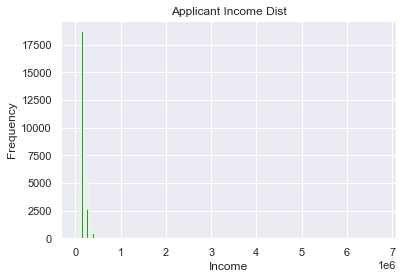

In [31]:
# create histograms for continuous variables
num_bins = 250
n, bins, patches = plt.hist(applications3['totalIncome'], num_bins, facecolor='green', alpha = .8)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Applicant Income Dist')

<AxesSubplot:>

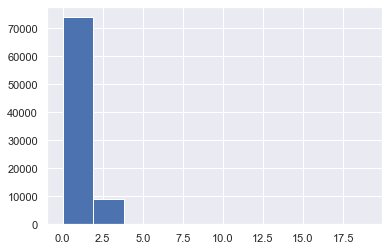

In [32]:
applications3['numChildren'].hist()

<AxesSubplot:>

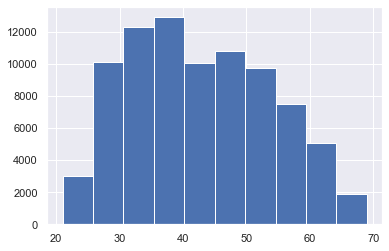

In [36]:
applications3['age'].hist()

<AxesSubplot:>

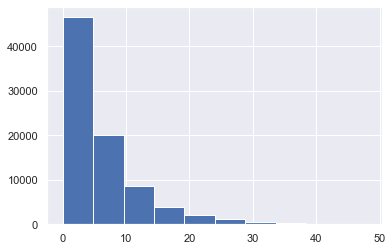

In [38]:
applications3['yrsEmpl'].hist()

<AxesSubplot:>

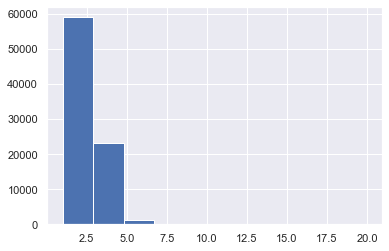

In [39]:
applications3['famSize'].hist()

<AxesSubplot:>

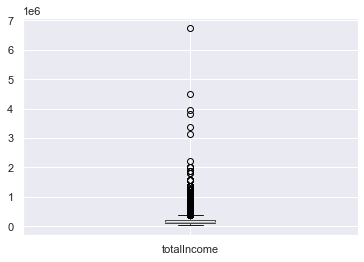

In [29]:
# Look for outliers
applications3.boxplot('totalIncome')

In [ ]:
applications3.boxplot('numChildren')

In [ ]:
applications3.boxplot('yrsEmpl')

In [ ]:
applications3.boxplot('famSize')

In [ ]:
num_bins = 10
n, bins, patches = plt.hist(applications3['age'], num_bins, facecolor='green', alpha = .8)
plt.xlabel('Age (Yrs)')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Age')

In [ ]:
# Correlation matrix
sns.heatmap(applications3.corr(), annot=True)

#### Categorical Variable Distributions

<AxesSubplot:>

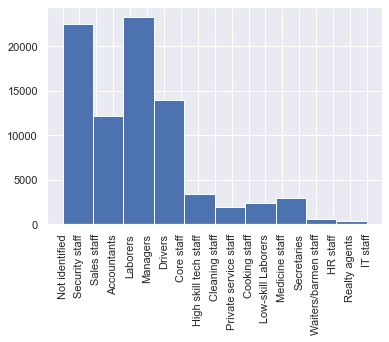

In [37]:
applications3['occupation'].hist(xrot=90)

#### Not identified seems to make up a significant amount of represented occupations. See if we can figure out what they are.

array([[<AxesSubplot:title={'center':'Accountants'}>,
        <AxesSubplot:title={'center':'Cleaning staff'}>,
        <AxesSubplot:title={'center':'Cooking staff'}>,
        <AxesSubplot:title={'center':'Core staff'}>],
       [<AxesSubplot:title={'center':'Drivers'}>,
        <AxesSubplot:title={'center':'HR staff'}>,
        <AxesSubplot:title={'center':'High skill tech staff'}>,
        <AxesSubplot:title={'center':'IT staff'}>],
       [<AxesSubplot:title={'center':'Laborers'}>,
        <AxesSubplot:title={'center':'Low-skill Laborers'}>,
        <AxesSubplot:title={'center':'Managers'}>,
        <AxesSubplot:title={'center':'Medicine staff'}>],
       [<AxesSubplot:title={'center':'Not identified'}>,
        <AxesSubplot:title={'center':'Private service staff'}>,
        <AxesSubplot:title={'center':'Realty agents'}>,
        <AxesSubplot:title={'center':'Sales staff'}>],
       [<AxesSubplot:title={'center':'Secretaries'}>,
        <AxesSubplot:title={'center':'Security staff'}>

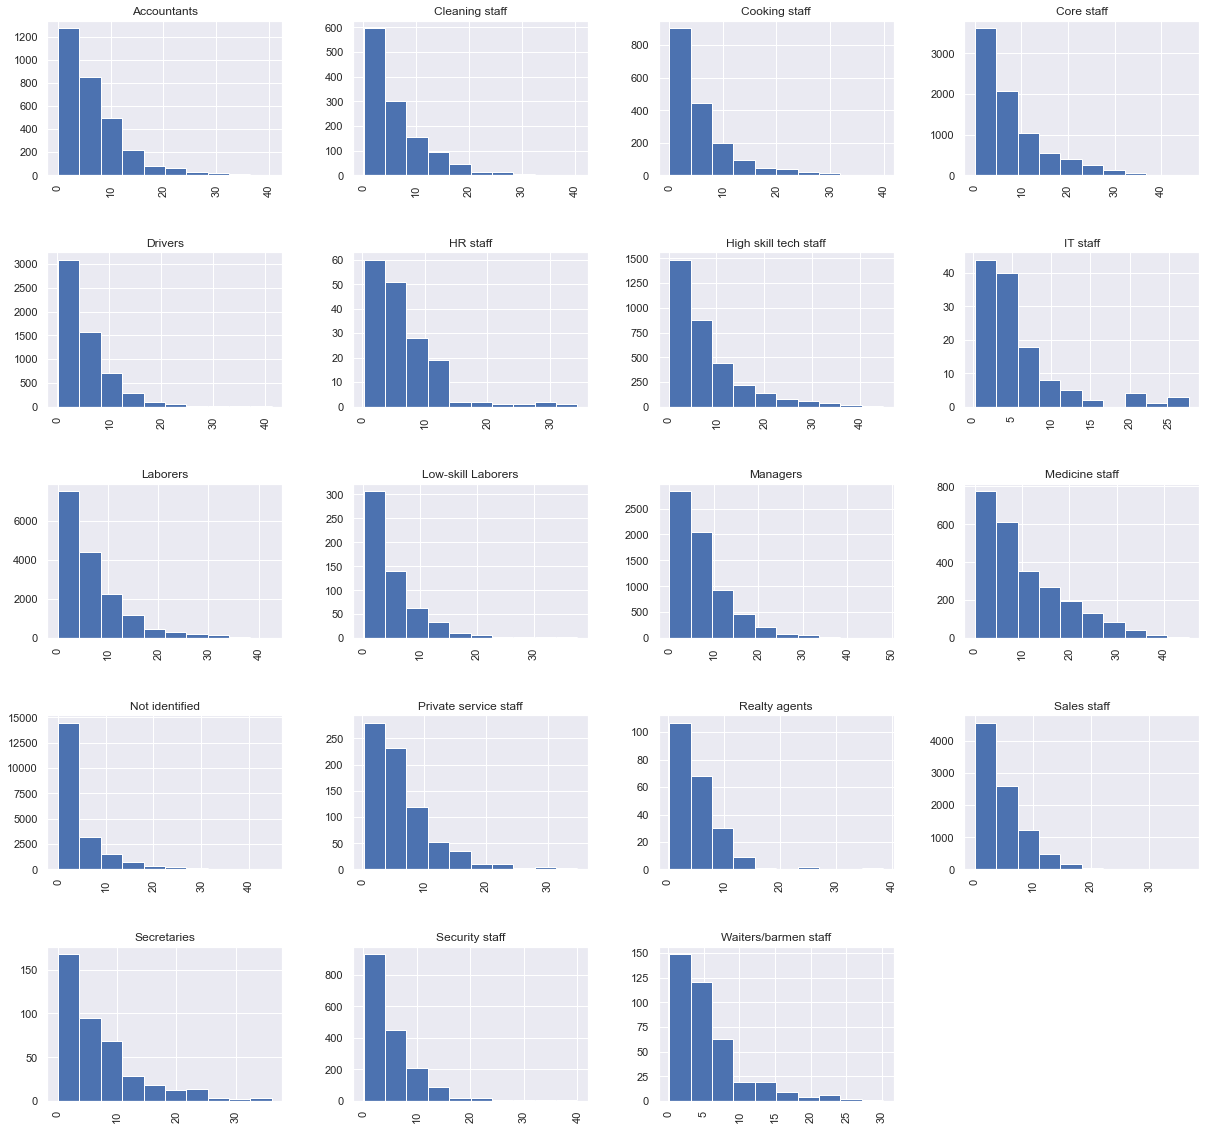

In [46]:
applications3[['yrsEmpl','occupation']].hist(by='occupation', figsize=(20, 20))

array([[<AxesSubplot:title={'center':'Commercial associate'}>,
        <AxesSubplot:title={'center':'Pensioner'}>],
       [<AxesSubplot:title={'center':'State servant'}>,
        <AxesSubplot:title={'center':'Student'}>],
       [<AxesSubplot:title={'center':'Working'}>, <AxesSubplot:>]],
      dtype=object)

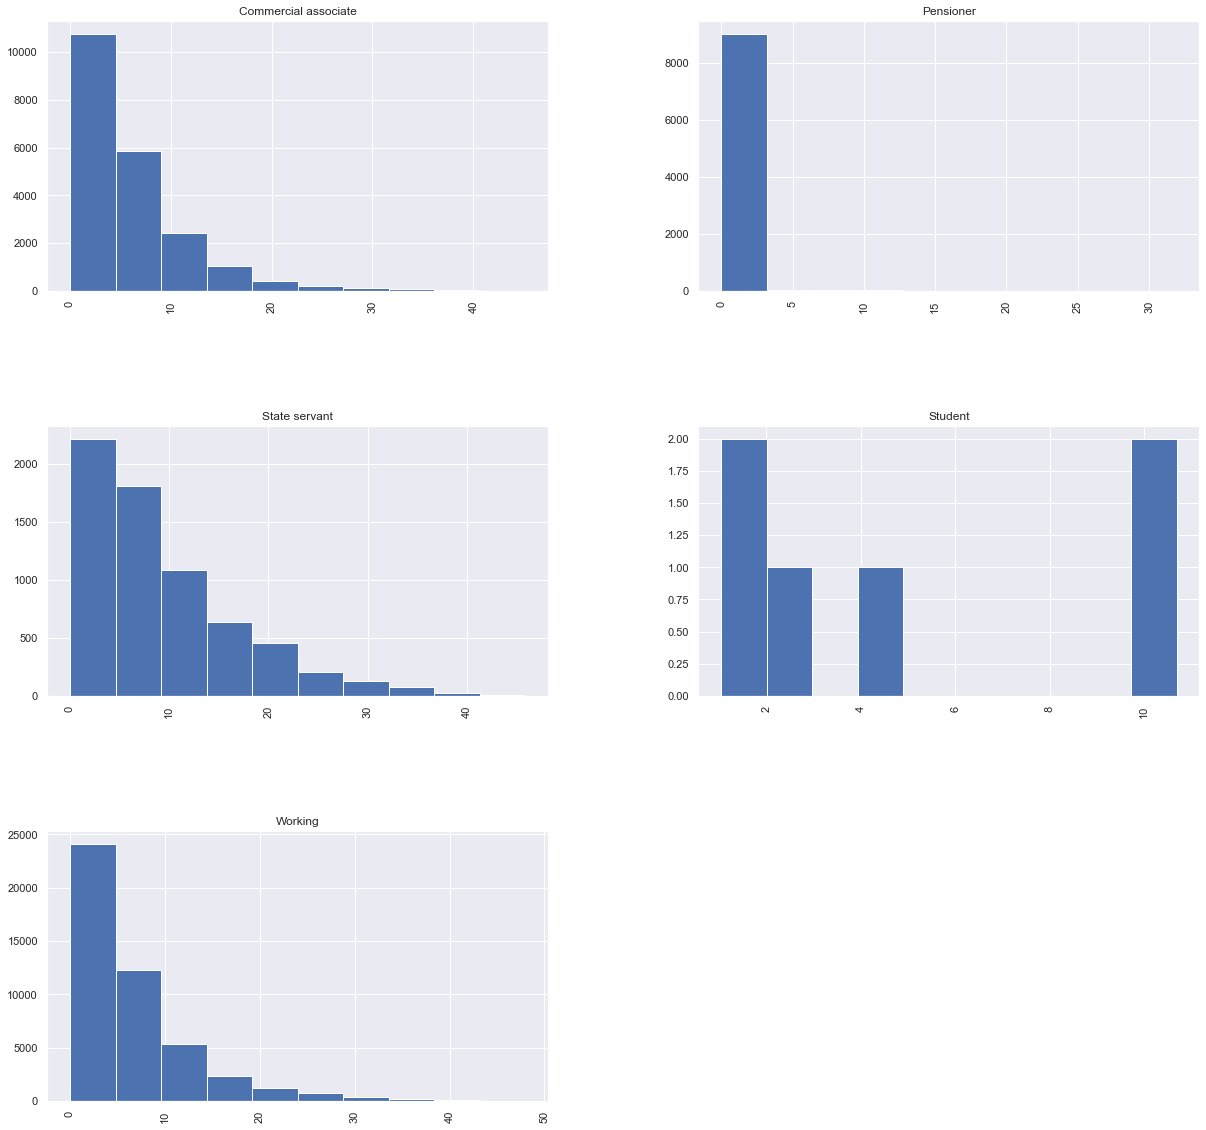

In [47]:
applications3[['yrsEmpl','incomeType']].hist(by='incomeType', figsize=(20, 20))

#### Seems to be a connection between Pensioner income type and Not identified occupation. Most of the missing occupation records are majority working pensioners it seems.

In [50]:
# So that we don't have so many missing values, changed 'Not identified' to 'Pensioner'
applications3.loc[(applications3['incomeType'] == 'Pensioner') & (applications3['occupation'] == 'Not identified'), 'occupation'] = 'Pensioner'

<AxesSubplot:>

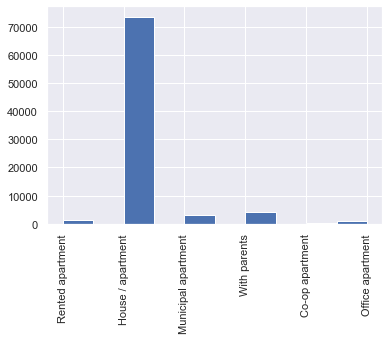

In [53]:
applications3['housingType'].hist(xrot=90)

<AxesSubplot:>

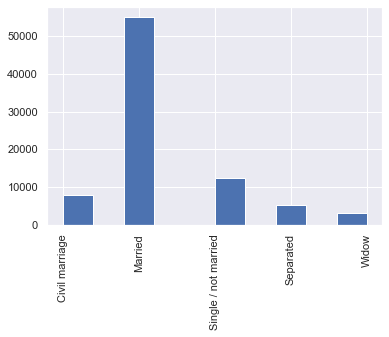

In [54]:
applications3['famStatus'].hist(xrot=90)

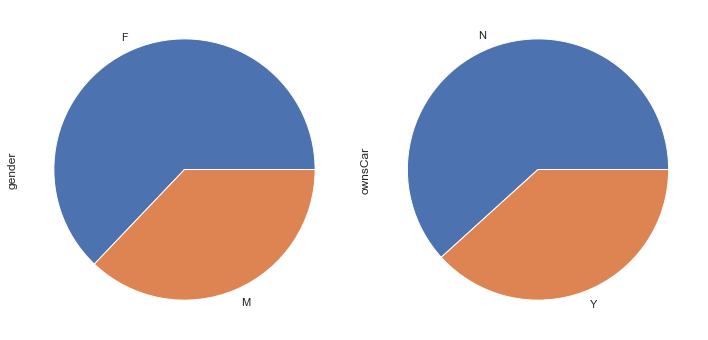

In [55]:
fig, axes = plt.subplots(1,2)
g1 = applications3.groupby('gender')['gender'].count().plot(kind='pie', y='gender', ax=axes[0])
g2 = applications3.groupby('ownsCar')['ownsCar'].count().plot(kind='pie', y='ownsCar', ax=axes[1])

fig.set_size_inches(10,5)

plt.tight_layout()

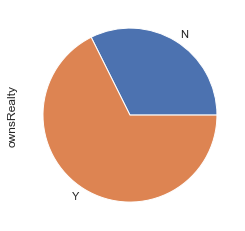

In [56]:
g3 = applications3.groupby('ownsRealty')['ownsRealty'].count().plot(kind='pie', y='ownsRealty')

In [ ]:
# Income type, family status distributions

fig, axes = plt.subplots(1,2)

incTDist=sns.countplot(y=applications3.incomeType,linewidth=1.2, ax=axes[0])
incTDist.set_title("Applicant Distribution by Income Type")
incTDist.set_xlabel("Count")

famDist=sns.countplot(y=applications3.famStatus,linewidth=1.2, ax=axes[1])
famDist.set_title("Applicant Distribution by Family Status")
famDist.set_xlabel("Count")

fig.set_size_inches(15,5)

plt.tight_layout()